In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import GoH.reports
import GoH.utilities
import GoH.clean
import GoH.normalize
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [4]:
%matplotlib inline

In [5]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-02-14-Roman-Numerals.txt",
             "2017-03-01-Additional-Approved-Words.txt"
            ]

In [6]:
spelling_dictionary = GoH.utilities.create_spelling_dictionary(wordlists, wordlist_dir)

In [7]:
title = "CE"

In [8]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/{}/".format(title)

## Baseline

In [9]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/CE/baseline

Average verified rate: 0.9354435814569106

Average of error rates: 0.0796414271047228

Total token count: 1970416



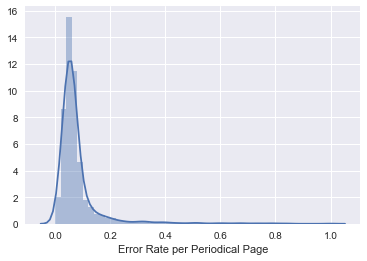

In [10]:
stats = GoH.reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [11]:
errors_summary = GoH.reports.get_errors_summary( stats )
GoH.reports.top_errors( errors_summary, 100 )

[('ñ', 8629),
 ('¥', 5694),
 ('-', 4467),
 (')', 2257),
 ('e', 1546),
 ('(', 1535),
 ("'", 1489),
 ('m', 1419),
 ('tion', 1327),
 ('d', 1294),
 ('in-', 1144),
 ('+', 1089),
 ('re-', 1031),
 ('con-', 1015),
 ('de-', 783),
 ('w', 717),
 ('be-', 691),
 ('x', 659),
 ('r', 626),
 ('ex-', 588),
 ('g', 568),
 ('t', 539),
 ('com-', 539),
 ('ment', 534),
 ('n', 518),
 ('/', 501),
 ('f', 489),
 ('tions', 413),
 ('chil-', 403),
 ('dren', 394),
 ('ers', 382),
 ('en-', 380),
 ('pro-', 367),
 ('=', 364),
 ('*', 360),
 ('stu-', 324),
 ('teach-', 315),
 ('un-', 309),
 ('educa-', 302),
 ('edu-', 299),
 ('pre-', 298),
 ('ac-', 288),
 ('¥¥', 286),
 ('per-', 286),
 ('im-', 284),
 ('ture', 259),
 ('dis-', 257),
 ('++', 253),
 ('ence', 243),
 ('col-', 237),
 ('ad-', 236),
 ('ap-', 233),
 ('al-', 217),
 ('sub-', 202),
 ('an-', 201),
 ('at-', 199),
 ('ful', 197),
 ('ments', 188),
 ('•', 175),
 ('mis-', 174),
 ('tional', 170),
 ('_', 151),
 ('ple', 149),
 ('to-', 148),
 ('lege', 146),
 ('co', 146),
 ('inter-',

## Correction 1 -- Special Characters

In [12]:
GoH.reports.tokens_with_special_characters(errors_summary)

[('ñ', 8629),
 ('¥', 5694),
 (')', 2257),
 ('(', 1535),
 ('+', 1089),
 ('/', 501),
 ('=', 364),
 ('*', 360),
 ('¥¥', 286),
 ('++', 253),
 ('•', 175),
 ('_', 151),
 ('(concluded', 124),
 ('%', 120),
 ('(see', 114),
 (']', 98),
 ('¥¥¥', 92),
 ('___', 82),
 ('numbers)', 80),
 ('\\', 80),
 ('(a)', 77),
 ('ó', 74),
 ('—', 73),
 ('(b)', 71),
 ('(fig', 70),
 ('ã', 69),
 ('(poem)', 66),
 ('[', 55),
 ('>', 54),
 ('(the', 51),
 ('`', 51),
 ('¡', 51),
 ('(study', 49),
 ('(poetry)', 43),
 ('¥¥¥¥', 41),
 ('(continued', 38),
 ('**', 37),
 ('(to', 37),
 ('(for', 34),
 ('ô', 33),
 ('(selections)', 33),
 ('(c)', 33),
 ('(native', 33),
 ('(colored)', 31),
 ('(or', 30),
 ('¥=', 30),
 ('[the', 29),
 ('ñthe', 28),
 ('\ufeff', 27),
 ('***', 27),
 ('(in', 27),
 ('(and', 26),
 ('<', 24),
 ('(i', 24),
 ('ers)', 23),
 ('*¥', 23),
 ('<>', 22),
 ('=¥', 22),
 ('m¥', 21),
 ('(with', 20),
 ('i)', 20),
 ('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++', 20),
 ('month)', 19),
 ('years)', 19),
 ('(not',

No obvious foreign language use.

## Correction 1 -- Normalize Characters

In [13]:
# %load shared_elements/normalize_characters.py
prev = "baseline"
cycle = "correction1"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"\’\’\‘\'\‛\´", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/CE/correction1

Average verified rate: 0.9492114539661417

Average of error rates: 0.06023742299794661

Total token count: 1947762



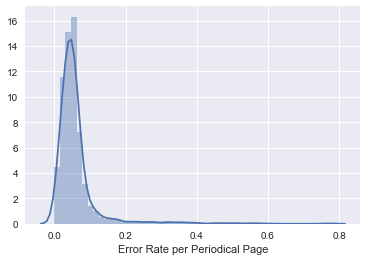

In [14]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [15]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('-', 4674),
 ('e', 1613),
 ("'", 1550),
 ('m', 1518),
 ('tion', 1328),
 ('d', 1315),
 ('in-', 1147),
 ('re-', 1033),
 ('con-', 1018),
 ('de-', 783),
 ('w', 737),
 ('r', 697),
 ('be-', 692),
 ('x', 681),
 ('t', 609),
 ('ex-', 590),
 ('g', 589),
 ('n', 565),
 ('com-', 543),
 ('ment', 535),
 ('f', 532),
 ('tions', 416),
 ('ers', 406),
 ('chil-', 403),
 ('dren', 394),
 ('en-', 380),
 ('pro-', 367),
 ('stu-', 324),
 ('teach-', 315),
 ('un-', 310),
 ('educa-', 306),
 ('edu-', 299),
 ('pre-', 299),
 ('ac-', 288),
 ('per-', 286),
 ('im-', 285),
 ('ture', 259),
 ('dis-', 257),
 ('col-', 247),
 ('ence', 243),
 ('ad-', 236),
 ('ap-', 234),
 ('al-', 217),
 ('sub-', 202),
 ('an-', 201),
 ('at-', 199),
 ('ful', 197),
 ('ments', 188),
 ('--', 181),
 ('mis-', 174)]

## Correction 2 -- Correct line-endings

In [16]:
# %load shared_elements/correct_line_endings.py
prev = cycle
cycle = "correction2"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/CE/correction2

Average verified rate: 0.9807650865741511

Average of error rates: 0.032333675564681724

Total token count: 1907209



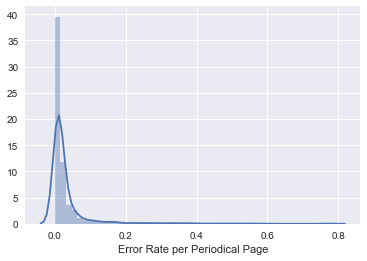

In [17]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [18]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('-', 4650),
 ('e', 1611),
 ("'", 1550),
 ('m', 1512),
 ('d', 1312),
 ('w', 735),
 ('r', 694),
 ('x', 680),
 ('t', 604),
 ('g', 588),
 ('n', 561),
 ('f', 528),
 ('--', 181),
 ('co', 147),
 ('u', 146),
 ('li', 140),
 ('k', 128),
 ('z', 80),
 ('---', 78),
 ('id', 72),
 ('parent-teacher', 62),
 ('pp', 61),
 ('io', 60),
 ('danish-norwegian', 58),
 ('ni', 55),
 ('oo', 55),
 ('-a', 54),
 ('-inch', 53),
 ('half-year', 49),
 ('high-school', 49),
 ('mo', 47),
 ("'tis", 45),
 ('mt', 44),
 ("an'", 43),
 ('tion', 43),
 ('ex', 43),
 ('th', 41),
 ('church-schools', 41),
 ('mm', 40),
 ('prayer-life', 39),
 ('ti', 39),
 ('il', 36),
 ('tle', 35),
 ('soul-winning', 35),
 ('eighth-grade', 35),
 ("hours'", 34),
 ('full-term', 34),
 ("'s", 34),
 ('ly', 33),
 ('ri', 33)]

## Correction 3 -- Address extra dashes

In [19]:
# %load shared_elements/remove_extra_dashes.py
prev = cycle
cycle = "correction3"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
#         print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/CE/correction3

Average verified rate: 0.984465544377934

Average of error rates: 0.026436601642710476

Total token count: 1904798



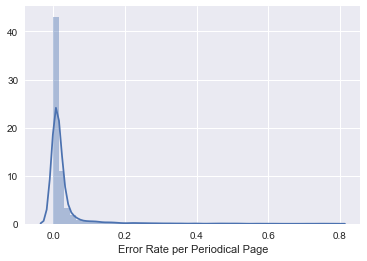

In [20]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [21]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('e', 1640),
 ("'", 1577),
 ('m', 1540),
 ('d', 1315),
 ('w', 741),
 ('r', 722),
 ('x', 683),
 ('t', 624),
 ('g', 592),
 ('n', 579),
 ('f', 551),
 ('co', 173),
 ('u', 148),
 ('li', 140),
 ('k', 131),
 ('z', 84),
 ('id', 73),
 ('io', 62),
 ('pp', 61),
 ('ni', 56),
 ('oo', 55),
 ('-', 52),
 ('ex', 52),
 ('re', 50),
 ('mo', 49),
 ("'tis", 45),
 ('mt', 44),
 ('tion', 44),
 ('ti', 43),
 ("an'", 43),
 ('th', 42),
 ('mm', 40),
 ('high-school', 40),
 ('prayer-life', 39),
 ('parent-teacher', 37),
 ('il', 37),
 ('tle', 37),
 ('al', 36),
 ('ly', 35),
 ('ri', 35),
 ("'s", 34),
 ("hours'", 34),
 ('ne', 34),
 ('q', 32),
 ('soul-winning', 32),
 ('em', 30),
 ('sq', 28),
 ('ev', 28),
 ('--', 27),
 ('danish-norwegian', 26)]

## Correction 4 -- Remove extra quotation marks

In [22]:
# %load shared_elements/remove_extra_quotation_marks.py
prev = cycle
cycle = "correction4"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 1:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            corrections.append((token, re.sub(r"'", r"", token)))   
        else:
            pass
    
    if len(corrections) > 0:
#         print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = GoH.clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/CE/correction4

Average verified rate: 0.9847679386475626

Average of error rates: 0.025965605749486656

Total token count: 1904798



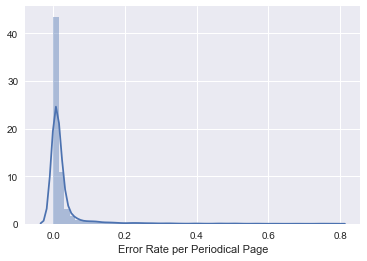

In [23]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [24]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('e', 1643),
 ('m', 1540),
 ("'", 1534),
 ('d', 1315),
 ('w', 743),
 ('r', 723),
 ('x', 684),
 ('t', 628),
 ('g', 593),
 ('n', 582),
 ('f', 552),
 ('co', 173),
 ('u', 148),
 ('li', 140),
 ('k', 132),
 ('z', 84),
 ('id', 73),
 ('io', 62),
 ('pp', 61),
 ('ni', 56),
 ('oo', 55),
 ('ex', 53),
 ('-', 52),
 ('re', 50),
 ('mo', 49),
 ('ry', 45),
 ('mt', 44),
 ('tion', 44),
 ('ti', 43),
 ("an'", 43),
 ('th', 42),
 ('mm', 40),
 ('high-school', 40),
 ('prayer-life', 39),
 ('parent-teacher', 37),
 ('il', 37),
 ('tle', 37),
 ('al', 36),
 ('ly', 35),
 ('ri', 35),
 ("hours'", 34),
 ('ne', 34),
 ('em', 34),
 ('q', 32),
 ('soul-winning', 32),
 ('sq', 28),
 ('ev', 28),
 ('--', 27),
 ('danish-norwegian', 26),
 ('tne', 26)]

## Correction 5 -- Rejoin Burst Words

In [25]:
# %load shared_elements/rejoin_burst_words.py
prev = cycle
cycle = "correction5"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    pattern = re.compile("(\s(\w{1,2}\s){5,})")
    
    replacements = []
    GoH.clean.check_splits(pattern, spelling_dictionary, content, replacements)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/CE/correction5

Average verified rate: 0.984769974642874

Average of error rates: 0.025962782340862425

Total token count: 1904790



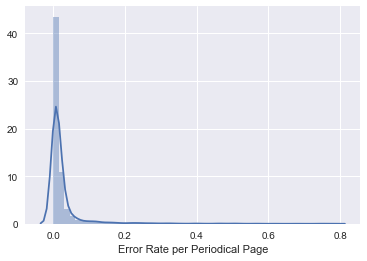

In [26]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [27]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('e', 1642),
 ('m', 1540),
 ("'", 1534),
 ('d', 1313),
 ('w', 743),
 ('r', 720),
 ('x', 684),
 ('t', 625),
 ('g', 592),
 ('n', 581),
 ('f', 551),
 ('co', 173),
 ('u', 147),
 ('li', 140),
 ('k', 132),
 ('z', 84),
 ('id', 73),
 ('io', 62),
 ('pp', 61),
 ('ni', 56),
 ('oo', 55),
 ('ex', 53),
 ('-', 52),
 ('re', 50),
 ('mo', 49),
 ('ry', 45),
 ('mt', 44),
 ('tion', 44),
 ('ti', 43),
 ("an'", 43),
 ('th', 42),
 ('mm', 40),
 ('high-school', 40),
 ('prayer-life', 39),
 ('parent-teacher', 37),
 ('il', 37),
 ('tle', 37),
 ('al', 36),
 ('ly', 35),
 ('ri', 35),
 ("hours'", 34),
 ('ne', 34),
 ('em', 34),
 ('q', 32),
 ('soul-winning', 32),
 ('sq', 28),
 ('ev', 28),
 ('--', 27),
 ('danish-norwegian', 26),
 ('tne', 26)]

## Correction 6 -- Rejoin Split Words

In [28]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction6"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=False)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/CE/correction6

Average verified rate: 0.985078098826811

Average of error rates: 0.02556827515400411

Total token count: 1904382



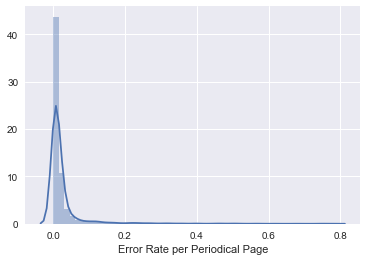

In [29]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [30]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('e', 1627),
 ("'", 1534),
 ('m', 1532),
 ('d', 1311),
 ('w', 742),
 ('r', 717),
 ('x', 682),
 ('t', 620),
 ('g', 589),
 ('n', 575),
 ('f', 551),
 ('u', 147),
 ('co', 142),
 ('k', 132),
 ('li', 122),
 ('z', 84),
 ('id', 73),
 ('pp', 61),
 ('io', 61),
 ('oo', 55),
 ('ni', 54),
 ('-', 52),
 ('ex', 52),
 ('mo', 44),
 ('mt', 44),
 ("an'", 43),
 ('mm', 42),
 ('high-school', 40),
 ('prayer-life', 39),
 ('ry', 39),
 ('th', 38),
 ('ti', 37),
 ('parent-teacher', 37),
 ('il', 37),
 ('tle', 36),
 ('re', 36),
 ("hours'", 34),
 ('tion', 34),
 ('ne', 33),
 ('ri', 33),
 ('em', 33),
 ('soul-winning', 32),
 ('q', 32),
 ('al', 28),
 ('sq', 28),
 ('--', 27),
 ('danish-norwegian', 26),
 ('ginn', 26),
 ('tne', 26),
 ('pa', 25)]

## Correction 7 -- Rejoin Split Words II

In [31]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction7"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=True)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/CE/correction7

Average verified rate: 0.9852580420347998

Average of error rates: 0.02533521560574949

Total token count: 1904089



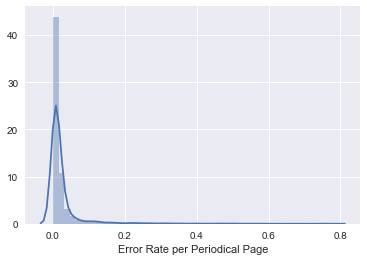

In [32]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [33]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('e', 1617),
 ("'", 1534),
 ('m', 1507),
 ('d', 1311),
 ('w', 734),
 ('r', 710),
 ('x', 682),
 ('t', 619),
 ('g', 589),
 ('n', 573),
 ('f', 547),
 ('u', 146),
 ('co', 141),
 ('k', 131),
 ('li', 115),
 ('z', 84),
 ('id', 73),
 ('io', 61),
 ('pp', 61),
 ('ni', 54),
 ('oo', 54),
 ('-', 52),
 ('ex', 52),
 ('mt', 44),
 ('mo', 43),
 ("an'", 43),
 ('mm', 42),
 ('high-school', 40),
 ('prayer-life', 39),
 ('th', 38),
 ('parent-teacher', 37),
 ('il', 37),
 ('ti', 36),
 ("hours'", 34),
 ('tion', 34),
 ('ne', 33),
 ('soul-winning', 32),
 ('q', 32),
 ('ri', 32),
 ('em', 32),
 ('re', 31),
 ('sq', 28),
 ('--', 27),
 ('al', 26),
 ('ry', 26),
 ('danish-norwegian', 26),
 ('ginn', 26),
 ('tne', 26),
 ('ft', 25),
 ('ph', 25)]

## Review Remaining Errors

In [34]:
GoH.reports.long_errors(errors_summary, min_length=15)

(['self-introductions',
  'teacher-training',
  'monommemommononommom',
  'large-mindedness',
  'consciencestricken',
  'civic-betterment',
  'foreign-language-speaking',
  'pinmoininiiiiiimmirmiiiimi',
  'college-prepared',
  'physician-system',
  'publishing-house',
  'thought-provoking',
  'viamioimmamvokimmumirmviagat',
  'ipwwwwwwwwwwwmoimmu',
  'uellimaiiiiimipamotogintnru',
  'gilssmoramsmwmmwmeorimmmmtim',
  'nwilmelmninnmnrrimmmmeffimmmmmmmmmon',
  'erezzigggeerrzwzreerizerreereeri',
  'mmmmmmwmmmmmmmmmmiswm',
  'katy-did-she-didshe-did',
  'ovimmiimitilliirymirtnin',
  'self-gratification',
  'cock-cock-cock-cock-a-doodledoo',
  'mmmmmmmimmsmnmnimmmmmm',
  'iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii',
  'mmhimmmmmmmmmmmnismmmmmmmmmmmmm',
  'peculiar-looking',
  'anti-tuberculosis',
  'mmkimmmessimkimm',
  'vocational-guidance',
  'iimmiiiiiimiiiiiiiiiiiiiiiiiiiffillii',
  'ownoommiwwwiwmlowni',
  'after-conferences',
  'student-teachers

## Correction 8 -- Remove long error tokens

In [43]:
# %load shared_elements/remove-tokens-with-long-strings-of-characters.py
prev = "correction7"
cycle = "correction8"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    sub_list = ["i|I", "w|W", "m|M", "e|E", "l|L", "x|X", "r|R", "t|T"]
    
    replacements = []
    for sub in sub_list:
        replacements.append(GoH.clean.check_for_repeating_characters(tokens, sub))
    
    replacements = [item for sublist in replacements for item in sublist]
            
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

CE19110401-V02-04-page3.txt: [('XXXXXXMCXXXXXXXXXXXXXXXXXXXXXO', ' '), ('XXXXXXXXXXXXXXXXXXXXXX', ' ')]
CE19110601-V02-05-page3.txt: [('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx', ' '), ('XXXXXXICCXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX', ' ')]
CE19110801-V02-06-page50.txt: [('riMMMUUMMIUMMEMMIESIIMIIMIMIIIMIIMUMIliMitiOIMA', ' '), ('riMMMUUMMIUMMEMMIESIIMIIMIMIIIMIIMUMIliMitiOIMA', ' ')]
CE19110801-V02-06-page52.txt: [('EIIIMIIIMIESIMigHiRIMMEMMMMIIIMIUMNIM', ' ')]
CE19120401-V03-04-page3.txt: [('MOMMMMOOOMMOMMOMMOMM', ' '), ('MOMMMOMMMOMIOMMOMMOMMOMMCOMMOMX', ' ')]
CE19120601-V03-05-page4.txt: [('mmmommommommonoznrmommommomonomm', ' '), ('gnramozgrazamonommmgramramommonommrm', ' '), ('uomommommoommomx', ' ')]
CE19121001-V04-01-page4.txt: [('IrurrrrrnttirrirrrrrrrrnriIIIII', ' ')]
CE19121001-V04-01-page60.txt: [('IIIIIIIIIIIIIIIII', ' '), ('IMMIMIIIIIIIIIIIIIM', ' ')]
CE19121001-V04-01-page64.txt: [('MOMMOMMOMMMOMM', ' ')]
CE19121001-V04-01-page67.txt: [('numnommmulanpnutonolunimmunommonnimo

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/CE/correction8

Average verified rate: 0.9853232442016993

Average of error rates: 0.025193018480492813

Total token count: 1903963



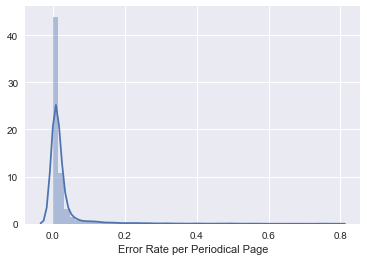

In [44]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [45]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('e', 1617),
 ("'", 1534),
 ('m', 1501),
 ('d', 1311),
 ('w', 734),
 ('r', 708),
 ('x', 682),
 ('t', 618),
 ('g', 589),
 ('n', 572),
 ('f', 547),
 ('u', 146),
 ('co', 141),
 ('k', 131),
 ('li', 115),
 ('z', 84),
 ('id', 73),
 ('io', 61),
 ('pp', 61),
 ('ni', 54),
 ('oo', 54),
 ('-', 52),
 ('ex', 52),
 ('mt', 44),
 ('mo', 43),
 ("an'", 43),
 ('mm', 42),
 ('high-school', 40),
 ('prayer-life', 39),
 ('th', 38),
 ('parent-teacher', 37),
 ('il', 37),
 ('ti', 36),
 ("hours'", 34),
 ('tion', 34),
 ('ne', 33),
 ('soul-winning', 32),
 ('q', 32),
 ('ri', 32),
 ('em', 32),
 ('re', 31),
 ('sq', 28),
 ('--', 27),
 ('al', 26),
 ('ry', 26),
 ('danish-norwegian', 26),
 ('ginn', 26),
 ('tne', 26),
 ('ft', 25),
 ('ph', 25)]

## Correction 9 -- Separate Squash Words

In [46]:
# %load shared_elements/separate_squashed_words.py
import pandas as pd
from math import log

prev = cycle
cycle = "correction9"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

verified_tokens = []

for filename in corpus:  
    content = GoH.utilities.readfile(directories['prev'], filename)
    GoH.normalize.get_approved_tokens(content, spelling_dictionary, verified_tokens)

tokens_with_freq = dict(collections.Counter(verified_tokens))
words = pd.DataFrame(list(tokens_with_freq.items()), columns=['token','freq'])
words_sorted = words.sort_values('freq', ascending=False)
words_sorted_short = words_sorted[words_sorted.freq > 2]

sorted_list_of_words = list(words_sorted_short['token'])

wordcost = dict((k, log((i+1)*log(len(sorted_list_of_words)))) for i,k in enumerate(sorted_list_of_words))
maxword = max(len(x) for x in sorted_list_of_words)

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    text = GoH.utilities.strip_punct(content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    
    for token in tokens:
        if not token.lower() in spelling_dictionary:
            if len(token) > 17:
                if re.search(r"[\-\-\'\"]", token):
                    pass
                else:
                    split_string = GoH.normalize.infer_spaces(token, wordcost, maxword)
                    list_split_string = split_string.split()
                    
                    if GoH.normalize.verify_split_string(list_split_string, spelling_dictionary):
                        replacements.append((token, split_string))
                    else:
                        pass
            else:
                pass
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

CE19100201-V01-03-page1.txt: [('consciencestricken', 'conscience stricken')]
CE19111001-V03-01-page25.txt: [('inductivedeductive', 'inductive deductive')]
CE19120401-V03-04-page43.txt: [('buttonholestitches', 'buttonhole stitches')]
CE19120601-V03-05-page54.txt: [('progressiveagitation', 'progressive agitation')]
CE19121001-V04-01-page66.txt: [('Undecidedwhatlineofwork', 'Undecided what line of work')]
CE19121201-V04-03-page2.txt: [('ANEWEVANGELICALMOVEMENTis', 'A NEW EVANGELICAL MOVEMENT is')]
CE19130401-V04-07-page2.txt: [('asolassammenamnreonm', 'a sol as s am men am n r e o n m')]
CE19131101-V05-03-page2.txt: [('TheGeneralConferenceMissionaryTraining', 'The General Conference Missionary Training')]
CE19131201-V05-04-page2.txt: [('ANEWEVANGELICALMOVEMENTisthegreatestneedof', 'A NEW EVANGELICAL MOVEMENT is the greatest need of')]
CE19141001-V06-02-page9.txt: [('expressinteresting', 'express interesting')]
CE19141101-V06-03-page34.txt: [('theonlydictionarywith', 'the only dictionary w

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/CE/correction9

Average verified rate: 0.9853311057762251

Average of error rates: 0.02517864476386037

Total token count: 1904029



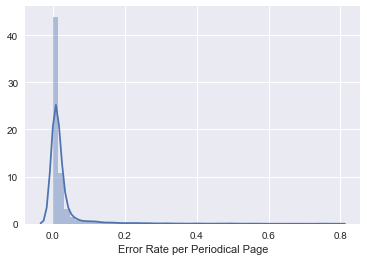

In [47]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [48]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('e', 1618),
 ("'", 1534),
 ('m', 1502),
 ('d', 1311),
 ('w', 734),
 ('r', 709),
 ('x', 682),
 ('t', 618),
 ('g', 589),
 ('n', 574),
 ('f', 547),
 ('u', 146),
 ('co', 141),
 ('k', 131),
 ('li', 115),
 ('z', 84),
 ('id', 73),
 ('pp', 61),
 ('io', 61),
 ('ni', 54),
 ('oo', 54),
 ('-', 52),
 ('ex', 52),
 ('mt', 44),
 ('mo', 43),
 ("an'", 43),
 ('mm', 42),
 ('high-school', 40),
 ('prayer-life', 39),
 ('th', 38),
 ('parent-teacher', 37),
 ('il', 37),
 ('ti', 36),
 ("hours'", 34),
 ('tion', 34),
 ('ne', 33),
 ('soul-winning', 32),
 ('q', 32),
 ('ri', 32),
 ('em', 32),
 ('re', 31),
 ('sq', 28),
 ('--', 27),
 ('al', 26),
 ('ry', 26),
 ('danish-norwegian', 26),
 ('ginn', 26),
 ('tne', 26),
 ('ft', 25),
 ('ph', 25)]